### Import necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
import json
import requests

### request the current listing data set (data for prediction) from Lending Club API

In [5]:
api_key = open('apikey.txt', 'r').read()
headers = {'Authorization': api_key}
url = 'https://api.lendingclub.com/api/investor/v1/loans/listing'
r = requests.get(url, headers = headers)

In [50]:
#data = r.json()
#MyData = data['loans']

In [ ]:
with open('current_list.txt','w') as outfile:
    json.dump(MyData, outfile)

In [8]:
df_current = pd.read_json('current_list.txt')
df_current

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,...,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
0,0,9,2017-11-07T16:03:55.000-08:00,GA,318xx,85.0,56000,NaN,INDIVIDUAL,19290,...,5827,327937,327632,36,227660,219712,10900,1,203126,19000
1,0,2,2017-11-12T14:58:07.000-08:00,NJ,088xx,76.5,190000,NaN,INDIVIDUAL,60851,...,0,669359,714760,13,71561,36652,43800,0,41789,51800
2,0,3,2017-11-12T16:58:50.000-08:00,IL,604xx,61.3,93000,NaN,INDIVIDUAL,5222,...,0,73108,147424,28,66519,33539,50300,1,45050,57800
3,0,3,2017-11-12T17:01:58.000-08:00,TX,786xx,65.8,27500,NaN,INDIVIDUAL,2077,...,1282,31152,47372,32,31152,28672,2000,3,42772,4600
4,0,0,2017-11-12T14:59:19.000-08:00,AZ,852xx,112.9,52000,NaN,INDIVIDUAL,20757,...,0,311349,316428,32,130064,106204,26600,0,88567,26600
5,0,2,2017-11-12T14:55:45.000-08:00,TX,793xx,73.2,131000,NaN,INDIVIDUAL,39232,...,0,196158,215350,11,22037,0,30100,0,0,30100
6,0,2,2017-11-12T16:26:23.000-08:00,MD,207xx,71.8,85000,NaN,INDIVIDUAL,5175,...,0,67272,94546,22,67272,29051,49800,0,42246,52300
7,0,4,2017-11-12T14:32:36.000-08:00,NV,891xx,5.1,35000,NaN,INDIVIDUAL,198,...,1705,1977,39100,26,1977,982,22000,0,12600,26500
8,0,2,2017-11-12T14:17:48.000-08:00,OR,972xx,70.7,40000,NaN,INDIVIDUAL,4548,...,0,13643,19300,5,13643,0,19300,0,0,19300
9,0,1,2017-11-12T16:51:14.000-08:00,MS,394xx,87.9,56711,NaN,INDIVIDUAL,10124,...,0,60743,64448,20,60743,39471,23000,0,40248,24200


In [51]:
# a better way to read json
#df_current = pd.io.json.json_normalize(MyData)
#df_current

### Import historical data set (downloaded from website)

In [9]:
df2014 = pd.read_csv('LoanStats3c_securev1.csv', skiprows = 1)

D:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df2014.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37822187,NaN,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df2014.shape

(235631, 128)

### compare the feature names of two data set

In [12]:
print '----------current---------'
for col in df_current.columns.values:
    print col

print '----------past---------'
for col in df2014.columns.values:
    print col

----------current---------
accNowDelinq
accOpenPast24Mths
acceptD
addrState
addrZip
allUtil
annualInc
annualIncJoint
applicationType
avgCurBal
bcOpenToBuy
bcUtil
chargeoffWithin12Mths
collections12MthsExMed
creditPullD
delinq2Yrs
delinqAmnt
desc
dti
dtiJoint
earliestCrLine
empLength
empTitle
expD
expDefaultRate
ficoRangeHigh
ficoRangeLow
fundedAmount
grade
homeOwnership
iLUtil
id
ilsExpD
initialListStatus
inqFi
inqLast12m
inqLast6Mths
installment
intRate
investorCount
isIncV
isIncVJoint
listD
loanAmount
maxBalBc
memberId
moSinOldIlAcct
moSinOldRevTlOp
moSinRcntRevTlOp
moSinRcntTl
mortAcc
mthsSinceLastDelinq
mthsSinceLastMajorDerog
mthsSinceLastRecord
mthsSinceRcntIl
mthsSinceRecentBc
mthsSinceRecentBcDlq
mthsSinceRecentInq
mthsSinceRecentRevolDelinq
numAcctsEver120Ppd
numActvBcTl
numActvRevTl
numBcSats
numBcTl
numIlTl
numOpRevTl
numRevAccts
numRevTlBalGt0
numSats
numTl120dpd2m
numTl30dpd
numTl90gDpd24m
numTlOpPast12m
openAcc
openAcc6m
openIl12m
openIl24m
openIl6m
openRv12m
openRv24m
pc

In [13]:
current_feature = list(df_current.columns.values)
his_feature = list(df2014.columns.values)

### Unify the feature names
1. transfrom all characters to lower case
2. remove underscore '_'
3. change name

In [14]:
for i in range(len(current_feature)):
    current_feature[i] = str.lower(str(current_feature[i]))
    
for i in range(len(his_feature)):
    his_feature[i] = str(his_feature[i]).replace('_','')

print current_feature
print his_feature

df_current.columns = current_feature
df2014.columns = his_feature

['accnowdelinq', 'accopenpast24mths', 'acceptd', 'addrstate', 'addrzip', 'allutil', 'annualinc', 'annualincjoint', 'applicationtype', 'avgcurbal', 'bcopentobuy', 'bcutil', 'chargeoffwithin12mths', 'collections12mthsexmed', 'creditpulld', 'delinq2yrs', 'delinqamnt', 'desc', 'dti', 'dtijoint', 'earliestcrline', 'emplength', 'emptitle', 'expd', 'expdefaultrate', 'ficorangehigh', 'ficorangelow', 'fundedamount', 'grade', 'homeownership', 'ilutil', 'id', 'ilsexpd', 'initialliststatus', 'inqfi', 'inqlast12m', 'inqlast6mths', 'installment', 'intrate', 'investorcount', 'isincv', 'isincvjoint', 'listd', 'loanamount', 'maxbalbc', 'memberid', 'mosinoldilacct', 'mosinoldrevtlop', 'mosinrcntrevtlop', 'mosinrcnttl', 'mortacc', 'mthssincelastdelinq', 'mthssincelastmajorderog', 'mthssincelastrecord', 'mthssincercntil', 'mthssincerecentbc', 'mthssincerecentbcdlq', 'mthssincerecentinq', 'mthssincerecentrevoldelinq', 'numacctsever120ppd', 'numactvbctl', 'numactvrevtl', 'numbcsats', 'numbctl', 'numiltl', '

In [15]:
#'addrzip' 'zipcode'
#'fundedamout' 'fundedamnt': different for historical and current data
#'loanamount' 'loanamnt'
#'isincvjoint'  'verificationstatusjoint'
#'isincv' 'verificationstatus'
#'numacctsever120ppd' 'numacctsever120pd'
#'accepted' 'issued'
df_current.rename(columns={ 'addrzip': 'zipcode',
                            'fundedamount': 'fundedamnt',
                            'loanamount': 'loanamnt',
                            'isincvjoint':'verificationstatusjoint',
                            'isincv':'verificationstatus',
                            'numacctsever120ppd':'numacctsever120pd'
                            #'acceptd':'issued'
                            }, inplace=True)

current_feature = list(df_current.columns.values)

### keep common features (93)
current data (test): keep all common features
historical data (train/test): keep all common features, besides 
- "issued": issued time. used to split train/validation data set
- "loanstatus": label 

In [16]:
common_feature = set(current_feature)&(set(his_feature))
print len(common_feature)
print common_feature

93
set(['bcopentobuy', 'numactvbctl', 'mthssincelastrecord', 'totcurbal', 'totalbalexmort', 'subgrade', 'mosinrcnttl', 'ficorangelow', 'mortacc', 'mthssincelastdelinq', 'verificationstatus', 'tothicredlim', 'maxbalbc', 'totalrevhilim', 'numtl120dpd2m', 'annualincjoint', 'earliestcrline', 'term', 'inqlast12m', 'totalacc', 'desc', 'loanamnt', 'installment', 'numrevaccts', 'numoprevtl', 'avgcurbal', 'openil6m', 'addrstate', 'mosinoldilacct', 'annualinc', 'revolutil', 'numsats', 'mthssincerecentbc', 'mthssincercntil', 'openrv24m', 'chargeoffwithin12mths', 'mosinoldrevtlop', 'taxliens', 'numacctsever120pd', 'openil12m', 'mthssincerecentinq', 'numiltl', 'totalcutl', 'mthssincelastmajorderog', 'initialliststatus', 'grade', 'numbctl', 'verificationstatusjoint', 'numactvrevtl', 'ficorangehigh', 'bcutil', 'totcollamt', 'memberid', 'applicationtype', 'intrate', 'dti', 'mthssincerecentbcdlq', 'homeownership', 'pubrec', 'accopenpast24mths', 'mthssincerecentrevoldelinq', 'openacc6m', 'totalbalil', '

In [17]:
current_unique = set(current_feature) - set(his_feature)
his_unique = set(his_feature) - set(current_feature) 

print current_unique
print his_unique

set(['expdefaultrate', 'creditpulld', 'reviewstatus', 'ilsexpd', 'investorcount', 'servicefeerate', 'reviewstatusd', 'listd', 'acceptd', 'expd'])
set(['lastficorangehigh', 'loanstatus', 'totalpymnt', 'issued', 'secappnumrevaccts', 'secappmthssincelastmajorderog', 'collectionrecoveryfee', 'secappcollections12mthsexmed', 'url', 'secapprevolutil', 'totalreclatefee', 'secappchargeoffwithin12mths', 'lastpymntamnt', 'lastficorangelow', 'title', 'pymntplan', 'totalrecint', 'revolbaljoint', 'secappopenil6m', 'secappopenacc', 'secappficorangehigh', 'outprncp', 'totalpymntinv', 'secappficorangelow', 'recoveries', 'fundedamntinv', 'lastpymntd', 'lastcreditpulld', 'totalrecprncp', 'secappearliestcrline', 'secappmortacc', 'outprncpinv', 'policycode', 'nextpymntd', 'secappinqlast6mths'])


In [18]:
data = df2014[list(common_feature) + ['issued','loanstatus']] #loanstatus: target label #issued: used to split train/validation
data.tail()

,bcopentobuy,numactvbctl,mthssincelastrecord,totcurbal,totalbalexmort,subgrade,mosinrcnttl,ficorangelow,mortacc,mthssincelastdelinq,...,ilutil,openil24m,mosinrcntrevtlop,allutil,openacc,numrevtlbalgt0,numtloppast12m,pubrecbankruptcies,issued,loanstatus
235626,36402.0,2.0,NaN,591610.0,50896.0,A4,5.0,715.0,2.0,13.0,...,NaN,NaN,5.0,NaN,21.0,3.0,4.0,0.0,Jan-2014,Fully Paid
235627,1822.0,1.0,NaN,73598.0,73598.0,D1,19.0,715.0,3.0,65.0,...,NaN,NaN,80.0,NaN,18.0,2.0,0.0,0.0,Jan-2014,Current
235628,2175.0,2.0,NaN,57477.0,57477.0,D3,4.0,680.0,2.0,9.0,...,NaN,NaN,4.0,NaN,6.0,2.0,2.0,0.0,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data14 = data[:-2] # remove NaN

In [20]:
data14.to_csv('loan_2014.csv', index = False)

# data exploration and feature engineering

In [4]:
df = pd.read_csv('loan_2014.csv')

D:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Missing values handling

In [5]:
#print ('dataset ({} rows) null value:\n'.format(df.shape[0]))
#print (df.isnull().sum())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235629 entries, 0 to 235628
Data columns (total 95 columns):
bcopentobuy                   233184 non-null float64
numactvbctl                   235629 non-null float64
mthssincelastrecord           41524 non-null float64
totcurbal                     235629 non-null float64
totalbalexmort                235629 non-null float64
subgrade                      235629 non-null object
mosinrcnttl                   235629 non-null float64
ficorangelow                  235629 non-null float64
mortacc                       235629 non-null float64
mthssincelastdelinq           119748 non-null float64
verificationstatus            235629 non-null object
tothicredlim                  235629 non-null float64
maxbalbc                      0 non-null float64
totalrevhilim                 235629 non-null float64
numtl120dpd2m                 227769 non-null float64
annualincjoint                0 non-null float64
earliestcrline                235629 n

### Find all-null features, numeric features and object features
- 77 numeric features, 18 categorical features
- 18 numeric features are completely missing values

In [6]:
#all-null features
col = df.columns
all_null_features = []
for i in col:
    if df[i].isnull().sum() == df.shape[0]:
        all_null_features.append(i)
    
# numeric features (77)
num_features = list(df.select_dtypes(include=['float64']).columns)

# categorical features (18)
cat_features = list(df.select_dtypes(include=['object']).columns)

In [7]:
cat_features

['subgrade',
 'verificationstatus',
 'earliestcrline',
 'term',
 'desc',
 'addrstate',
 'revolutil',
 'initialliststatus',
 'grade',
 'applicationtype',
 'intrate',
 'homeownership',
 'zipcode',
 'emptitle',
 'purpose',
 'emplength',
 'issued',
 'loanstatus']

### pre-process categorical feature
- grade/subgrade: ordinal cat feature, should use label encoding rather than ONE HOT Encoding
- earliestcrline: has some levels with only 1 observation
(convert to numerical feature: because longer credit history, more solid credit)
- term: choose 36 month only DROP after choose 36-month data
- desc: has too many missing values (220350) DROP
- addrstate: has three states with only 1 observation (IA,ID,ME)
too many levels, can use frequency as a new feature 
- revolutil: 125 missing values, can be converted to numerical feature?
- initialliststatus:
- applicationtype: only one level (individual) DROP
- intrate: can be converted to numerical feature
- homeownership: one outlier need to be removed ('ANY')
- zipcode: can remove last two digit xx can convert it to numerical feature, frequency encoding
- emptitle: too many missing values (13236), too many levels, can be grouped using NLP and 'others', frequency encoding
- emplength: convert to numerical features
n/a: to a negative number (bad than <1)
- issued: use as split point for training/test data
- loanstatus can be grouped to two levels (fully paid, charged off)

In [8]:
for i in range(len(cat_features)):
    feat = cat_features[i]
    print feat
    print df[feat].isnull().sum()
    print df[feat].value_counts()

subgrade
0
C2    13965
C3    13794
C1    13498
B4    13475
B5    13309
C4    13093
B3    13075
C5    12215
B2    11439
D1    10880
A5    10761
B1    10637
D2     9544
A4     9124
D3     8487
D4     7881
D5     6200
A3     5842
E1     5589
A2     5234
A1     5147
E2     4831
E3     3902
E4     3101
E5     2698
F1     1935
F2     1355
F3     1321
F4      964
F5      648
G1      527
G2      427
G3      305
G4      214
G5      212
Name: subgrade, dtype: int64
verificationstatus
0
Source Verified    97741
Not Verified       70659
Verified           67229
Name: verificationstatus, dtype: int64
earliestcrline
0
Aug-2001    1980
Aug-2000    1945
Sep-2000    1719
Aug-2002    1711
Aug-1999    1696
Oct-2000    1658
Sep-1999    1642
Sep-2002    1574
Oct-2001    1574
Sep-2001    1562
Oct-1999    1543
Nov-1999    1525
Sep-1998    1505
Oct-2002    1472
Nov-2000    1468
Mar-2001    1452
Nov-2001    1440
Jul-2001    1421
Sep-2003    1415
Mar-2000    1399
Aug-2003    1389
May-2001    1384
Oct-1998    13

In [9]:
## For a issued loan, fundedamnt = loanamnt, drop fundedamnt
sum(df.fundedamnt != df.loanamnt) # check whether fundedamnt = loanamnt

0

In [10]:
## query data, only select 36 months and Fully paid/charged off
df2 = df.query("term == ' 36 months' and (loanstatus == 'Fully Paid' or loanstatus == 'Charged Off')") # notice the space before '36 months'
print df2.shape
df2.loanstatus = df2.loanstatus.map({'Fully Paid':0, 'Charged Off':1})
print df2.loanstatus.value_counts()

(129487, 95)
0    108778
1     20709
Name: loanstatus, dtype: int64


D:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Visulization

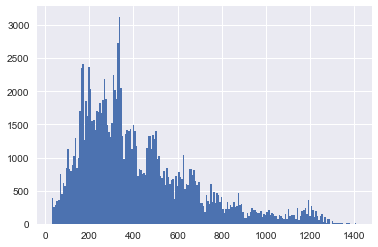

In [11]:
df2.installment.hist(bins=200)

### barplots for mean response

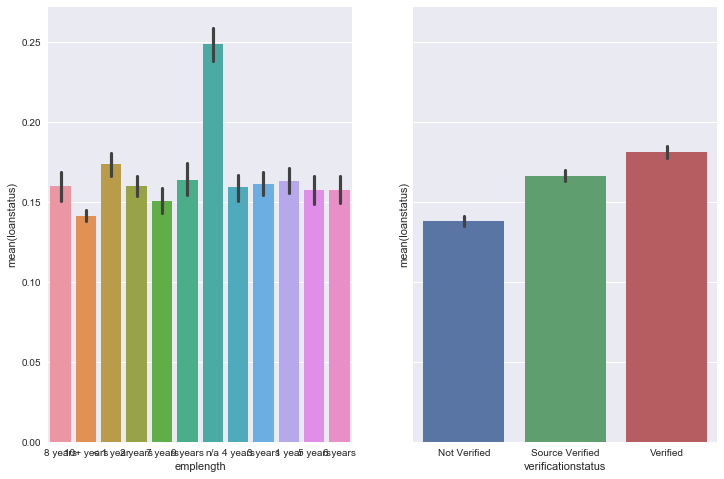

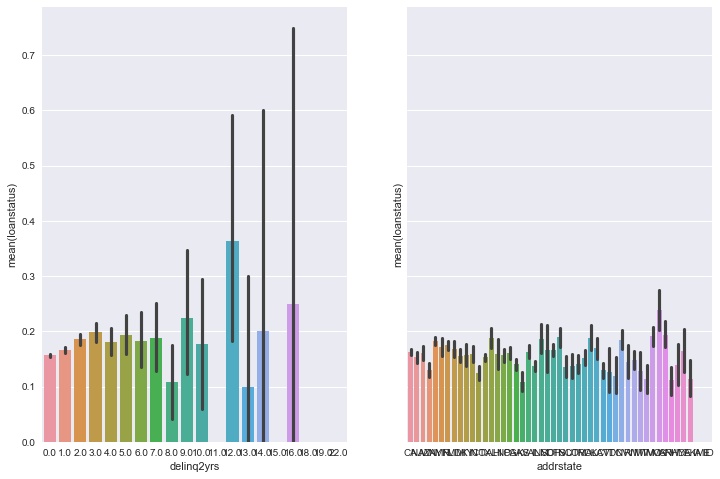

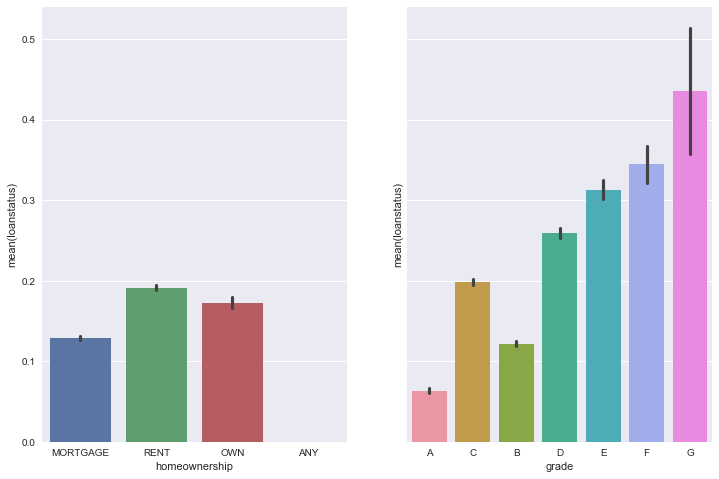

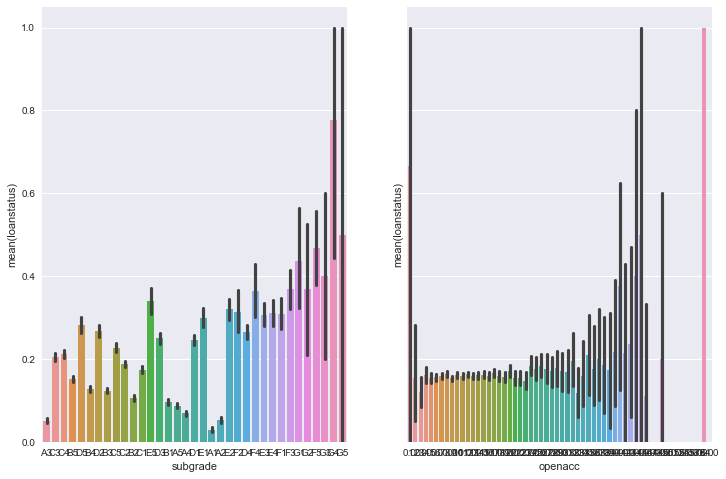

In [12]:
dummy_list = ['emplength','verificationstatus','delinq2yrs','addrstate','homeownership','grade','subgrade','openacc']
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.barplot(x=df2[dummy_list[i*n_cols+j]], y = df2.loanstatus, ax=ax[j])

## Feature engineering

### earliestcrline (convert to numerical feature: number of months to Jan-2015)

In [13]:
df2.earliestcrline.unique()[:5]

array(['Sep-1989', 'Nov-1992', 'Aug-2002', 'Oct-1998', 'Jan-2001'], dtype=object)

In [14]:
cl_month = df2.earliestcrline.apply(lambda x:x.split('-')[0])
cl_year = df2.earliestcrline.apply(lambda x:x.split('-')[1])
print cl_month.unique()[:5]
print cl_year.unique()[:5]

['Sep' 'Nov' 'Aug' 'Oct' 'Jan']
['1989' '1992' '2002' '1998' '2001']


In [15]:
dic_month = {'Jan':11, 'Feb':10, 'Mar':9, 'Apr':8,'May':7,'Jun':6,'Jul':5,'Aug':4,'Sep':3,'Oct':2,'Nov':1,'Dec':0}

D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Axes(0.125,0.125;0.775x0.755)


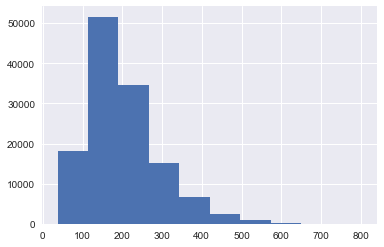

In [16]:
df2['earliestcrline_month'] = df.earliestcrline.apply(lambda x: (2014-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])
print df2.earliestcrline_month.hist()

In [17]:
num_features.append('earliestcrline_month')
cat_features.remove('earliestcrline')

### emplenth (convert to numerical feature)
- replace 'n/a' with np.nan
- fill na with -999
- replace "<1 year" with 0
- replace "x year" with x
- convert to "integer"

In [18]:
df2.emplength.replace('n/a',np.nan,inplace=True)
df2.emplength.fillna(value = -999,inplace=True)
df2.emplength.replace('< 1 year', '0', inplace=True)
df2.emplength.replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df2.emplength = df2.emplength.astype(int)
df2.emplength.value_counts()

D:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


 10     40456
 2      11807
 0      10538
 3      10523
 1       8502
 4       7572
 5       7395
-999     7321
 7       7211
 6       6704
 8       6457
 9       5001
Name: emplength, dtype: int64

In [19]:
num_features.append('emplength')
cat_features.remove('emplength')

### intrate, revolutil (convert % to numerical feature)

In [20]:
print df2.intrate[:5]
print df2.revolutil[:5]

0      6.99%
2     13.66%
3     13.66%
6     14.31%
7     13.66%
Name: intrate, dtype: object
0    31.6%
2    59.4%
3    91.9%
6    82.2%
7    46.4%
Name: revolutil, dtype: object


In [21]:
df2.intrate = df2.intrate.apply(lambda x: float(x.replace('%','')))
df2.revolutil = df2.revolutil.apply(lambda x: str(x).replace('%','')).astype('float')

In [22]:
num_features.append('intrate')
cat_features.remove('intrate')
num_features.append('revolutil')
cat_features.remove('revolutil')

### Grade, subgrade (convert ordinal features to numerial features)

In [23]:
print df2.grade.unique()
print df2.subgrade.unique()

['A' 'C' 'B' 'D' 'E' 'F' 'G']
['A3' 'C3' 'C4' 'B5' 'D5' 'B4' 'D2' 'B3' 'C5' 'C2' 'B2' 'C1' 'E5' 'D3' 'B1'
 'A5' 'A4' 'D1' 'E1' 'A1' 'A2' 'E2' 'F2' 'D4' 'F4' 'E3' 'E4' 'F1' 'F3' 'G1'
 'G2' 'F5' 'G3' 'G4' 'G5']


In [24]:
dic_grade = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df2.grade = df2.grade.map(dic_grade)

In [25]:
df2.subgrade = df2.subgrade.apply(lambda x: (dic_grade[x[0]]-1)*5 + int(x[1]))

In [26]:
num_features.append('grade')
cat_features.remove('grade')
num_features.append('subgrade')
cat_features.remove('subgrade')

### zip code (covert to numerical feature and frequency encoding)

In [27]:
df2.zipcode = df2.zipcode.apply(lambda x: int(x[0:3]))

In [28]:
df2.zipcode[:5]

0    937
2     77
3    850
6    982
7    144
Name: zipcode, dtype: int64

In [29]:
zipcode_freq = df2.groupby('zipcode').size().reset_index()

In [30]:
zipcode_freq.columns = ['zipcode','zipcode_freq']

In [31]:
df2 = pd.merge(df2, zipcode_freq, how='left', on='zipcode')

In [32]:
df2.zipcode_freq[:5]

0    203
1    288
2    602
3    381
4    163
Name: zipcode_freq, dtype: int64

In [33]:
num_features.append('zipcode')
cat_features.remove('zipcode')
num_features.append('zipcode_freq')

### emptitle (frequency encoding)

In [34]:
emptitle_freq = df2.groupby('emptitle').size().reset_index()
emptitle_freq.columns = ['emptitle','emptitle_freq']
df2 = pd.merge(df2, emptitle_freq, how='left', on='emptitle')

In [35]:
cat_features.remove('emptitle')
num_features.append('emptitle_freq')

### addrstate (frequency encoding)

In [36]:
addrstate_freq = df2.groupby('addrstate').size().reset_index()
addrstate_freq.columns = ['addrstate','addrstate_freq']
df2 = pd.merge(df2, addrstate_freq, how='left', on='addrstate')

In [37]:
cat_features.remove('addrstate')
num_features.append('addrstate_freq')

### ONE HOT encoding ('homeownership','verificationstatus','purpose','initialliststatus') 
these features only have a few levels

In [38]:
dummy_features = ['homeownership','verificationstatus','purpose','initialliststatus']
df_dummy = pd.get_dummies(df2[dummy_features])

In [39]:
ONE_feature = list(df_dummy.columns.values)
len(ONE_feature)

22

In [40]:
df2 = pd.concat([df2,df_dummy], axis = 1)
df2.shape

(129487, 121)

In [41]:
cat_features = [x for x in cat_features if x not in dummy_features]
print cat_features

['term', 'desc', 'applicationtype', 'issued', 'loanstatus']


In [42]:
df2.shape

(129487, 121)

## Select features

In [43]:
num_features = [x for x in num_features if x not in list(all_null_features)]
len(num_features) 

68

In [44]:
cat_features = [x for x in cat_features if x not in list(all_null_features)]
cat_features

['term', 'desc', 'applicationtype', 'issued', 'loanstatus']

In [45]:
select_features = num_features + ONE_feature + ['loanstatus'] + ['issued']

In [46]:
df2 = df2[select_features]
df2.shape

(129487, 92)

## Split train/test data

In [47]:
label = df2.loanstatus
train = df2.query("issued != 'Dec-2014' and issued != 'Nov-2014' ")
test = df2.query("issued == 'Dec-2014' or issued == 'Nov-2014' ")
print len(label)
print train.shape
print test.shape

129487
(115798, 92)
(13689, 92)


In [65]:
df2.loanstatus.value_counts(normalize=True)

0    0.840069
1    0.159931
Name: loanstatus, dtype: float64

In [68]:
train.to_csv('train.csv',index = False)
test.to_csv('test.csv',index = False)